In [ ]:
# 安装第三方库
%pip install statsmodels

In [1]:
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 读取并展示数据
data = pd.read_csv('./data/simple_example.csv')
data

,x,y
0,10,7.70
1,10,9.87
2,11,11.18
3,12,10.43
4,13,12.36
5,14,14.15
6,15,15.73
7,16,16.40
8,17,18.86
9,18,16.13


In [3]:
# 数据准备
features, labels = ['x'], ['y']
Y = data[labels]
# 加入常量变量
X = sm.add_constant(data[features])
X, Y

(    const   x
 0     1.0  10
 1     1.0  10
 2     1.0  11
 3     1.0  12
 4     1.0  13
 5     1.0  14
 6     1.0  15
 7     1.0  16
 8     1.0  17
 9     1.0  18
 10    1.0  19
 11    1.0  20
 12    1.0  21
 13    1.0  22
 14    1.0  23
 15    1.0  24
 16    1.0  25
 17    1.0  26
 18    1.0  27
 19    1.0  28,
         y
 0    7.70
 1    9.87
 2   11.18
 3   10.43
 4   12.36
 5   14.15
 6   15.73
 7   16.40
 8   18.86
 9   16.13
 10  18.21
 11  18.37
 12  22.61
 13  19.83
 14  22.67
 15  22.70
 16  25.16
 17  25.55
 18  28.21
 19  28.12)

In [4]:
# 构建并训练模型
model = sm.OLS(Y, X)
re = model.fit()
re

In [5]:
# 整体统计分析结果
print(re.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     460.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           2.85e-14
Time:                        13:46:51   Log-Likelihood:                -31.374
No. Observations:                  20   AIC:                             66.75
Df Residuals:                      18   BIC:                             68.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9495      0.934     -1.017      0.3

In [6]:
# 用f_test检测x对应的系数a是否显著
print('检验假设x的系数等于0：')
print(re.f_test('x=0'))

检验假设x的系数等于0：
<F test: F=460.45848220343134, p=2.84846541449568e-14, df_denom=18, df_num=1>


In [7]:
# 用f_test检测常量b是否显著
print('检测假设const的系数等于0：')
print(re.f_test('const=0'))

检测假设const的系数等于0：
<F test: F=1.0335579388583234, p=0.32279564008314576, df_denom=18, df_num=1>


In [8]:
# 用f_test检测a=1, b=0同时成立的显著性
print('检测假设x的系数等于1和const的系数等于0同时成立：')
print(re.f_test(['x=1', 'const=0']))

检测假设x的系数等于1和const的系数等于0同时成立：
<F test: F=0.9965463122445117, p=0.38862679760638896, df_denom=18, df_num=2>


In [9]:
# const并不显著，去掉这个常量变量
# 构建新的模型
model_new = sm.OLS(Y, data[features])
re_new = model_new.fit()
# 输出新模型的分析结果
print(re_new.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              4876.
Date:                Wed, 31 Jul 2024   Prob (F-statistic):                    2.26e-24
Time:                        13:47:03   Log-Likelihood:                         -31.933
No. Observations:                  20   AIC:                                      65.87
Df Residuals:                      19   BIC:                                      66.86
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

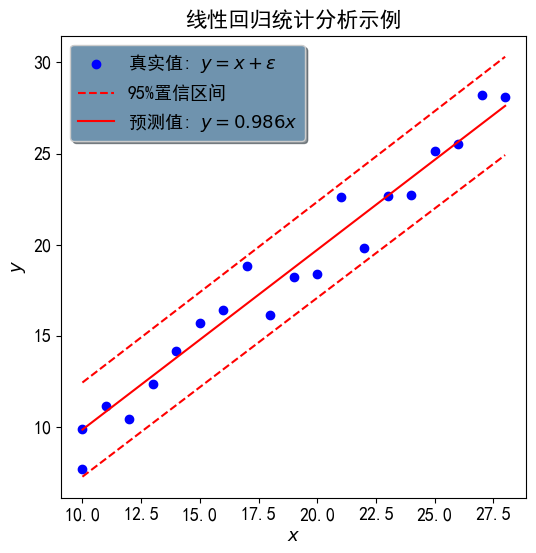

In [10]:
# 计算预测结果的标准差，预测下界，预测上界
pre_std, pre_low, pre_up = wls_prediction_std(re_new, alpha=0.05)
# 为在Matplotlib中显示中文，设置特殊字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
# 创建一个图形框
fig = plt.figure(figsize=(6, 6), dpi=100)
# 在图形框里只画一幅图
ax = fig.add_subplot(111)
ax.set_title('线性回归统计分析示例')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
# 画点图，用蓝色圆点表示原始数据
ax.scatter(data[features], data[labels], color='b', label='真实值: $y = x + \epsilon$')
# 画线图，用红色虚线表示95%置信区间
ax.plot(data[features], pre_up, 'r--', label='95%置信区间')
ax.plot(data[features], re_new.predict(data[features]), color='r',
        label=f'预测值: $y = {re_new.params[features].item():.3f}x$')
ax.plot(data[features], pre_low, 'r--')
# 设置图例的样式
legend = plt.legend(shadow=True)
legend.get_frame().set_facecolor('#6F93AE')
plt.savefig('linear_stat.png', dpi=200)
plt.show()